In [4]:
# Load the dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('/content/Churn_Modelling.csv')

data = data.iloc[:,3:]
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# Perform Below Visualizations

In [ ]:
# 1. Univariate Analysis

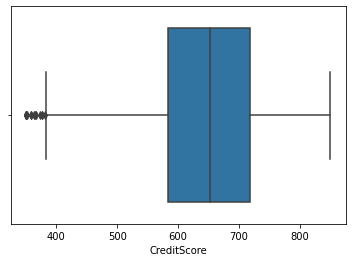

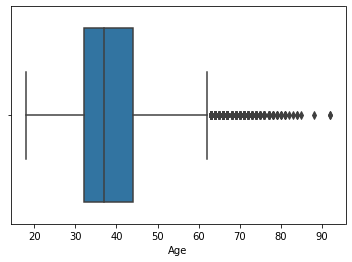

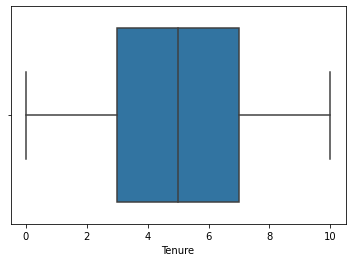

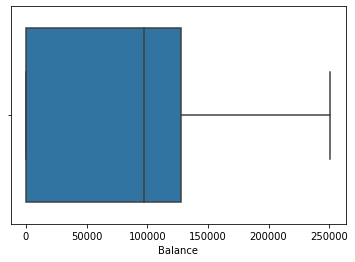

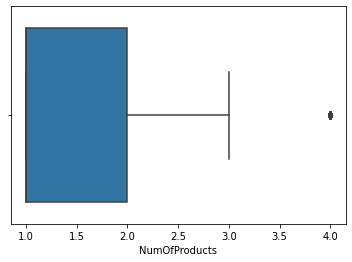

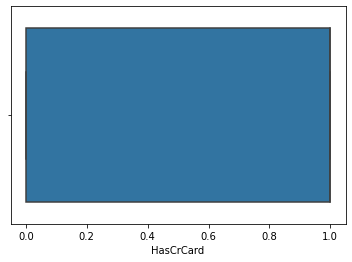

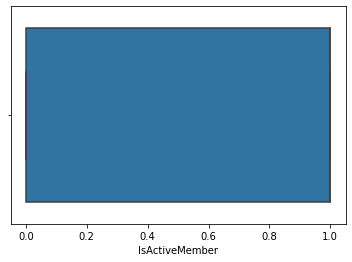

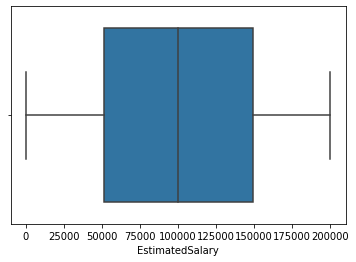

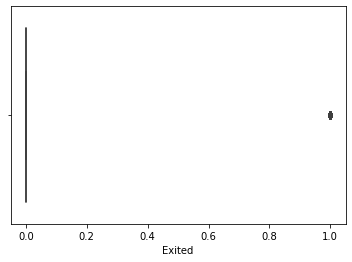

In [8]:
for col in data.columns:
  if(data.dtypes[col]=='int64' or data.dtypes[col]=='float64' ):
    sns.boxplot(x=data[col]).set( xlabel=col)
    plt.show()

In [9]:
# 2. Bi-Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


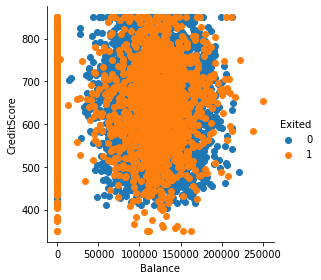

In [15]:
sns.FacetGrid(data,hue='Exited',size=5).map(plt.scatter,"Balance","CreditScore").add_legend()
plt.show()

In [12]:
# 3.Multivariate

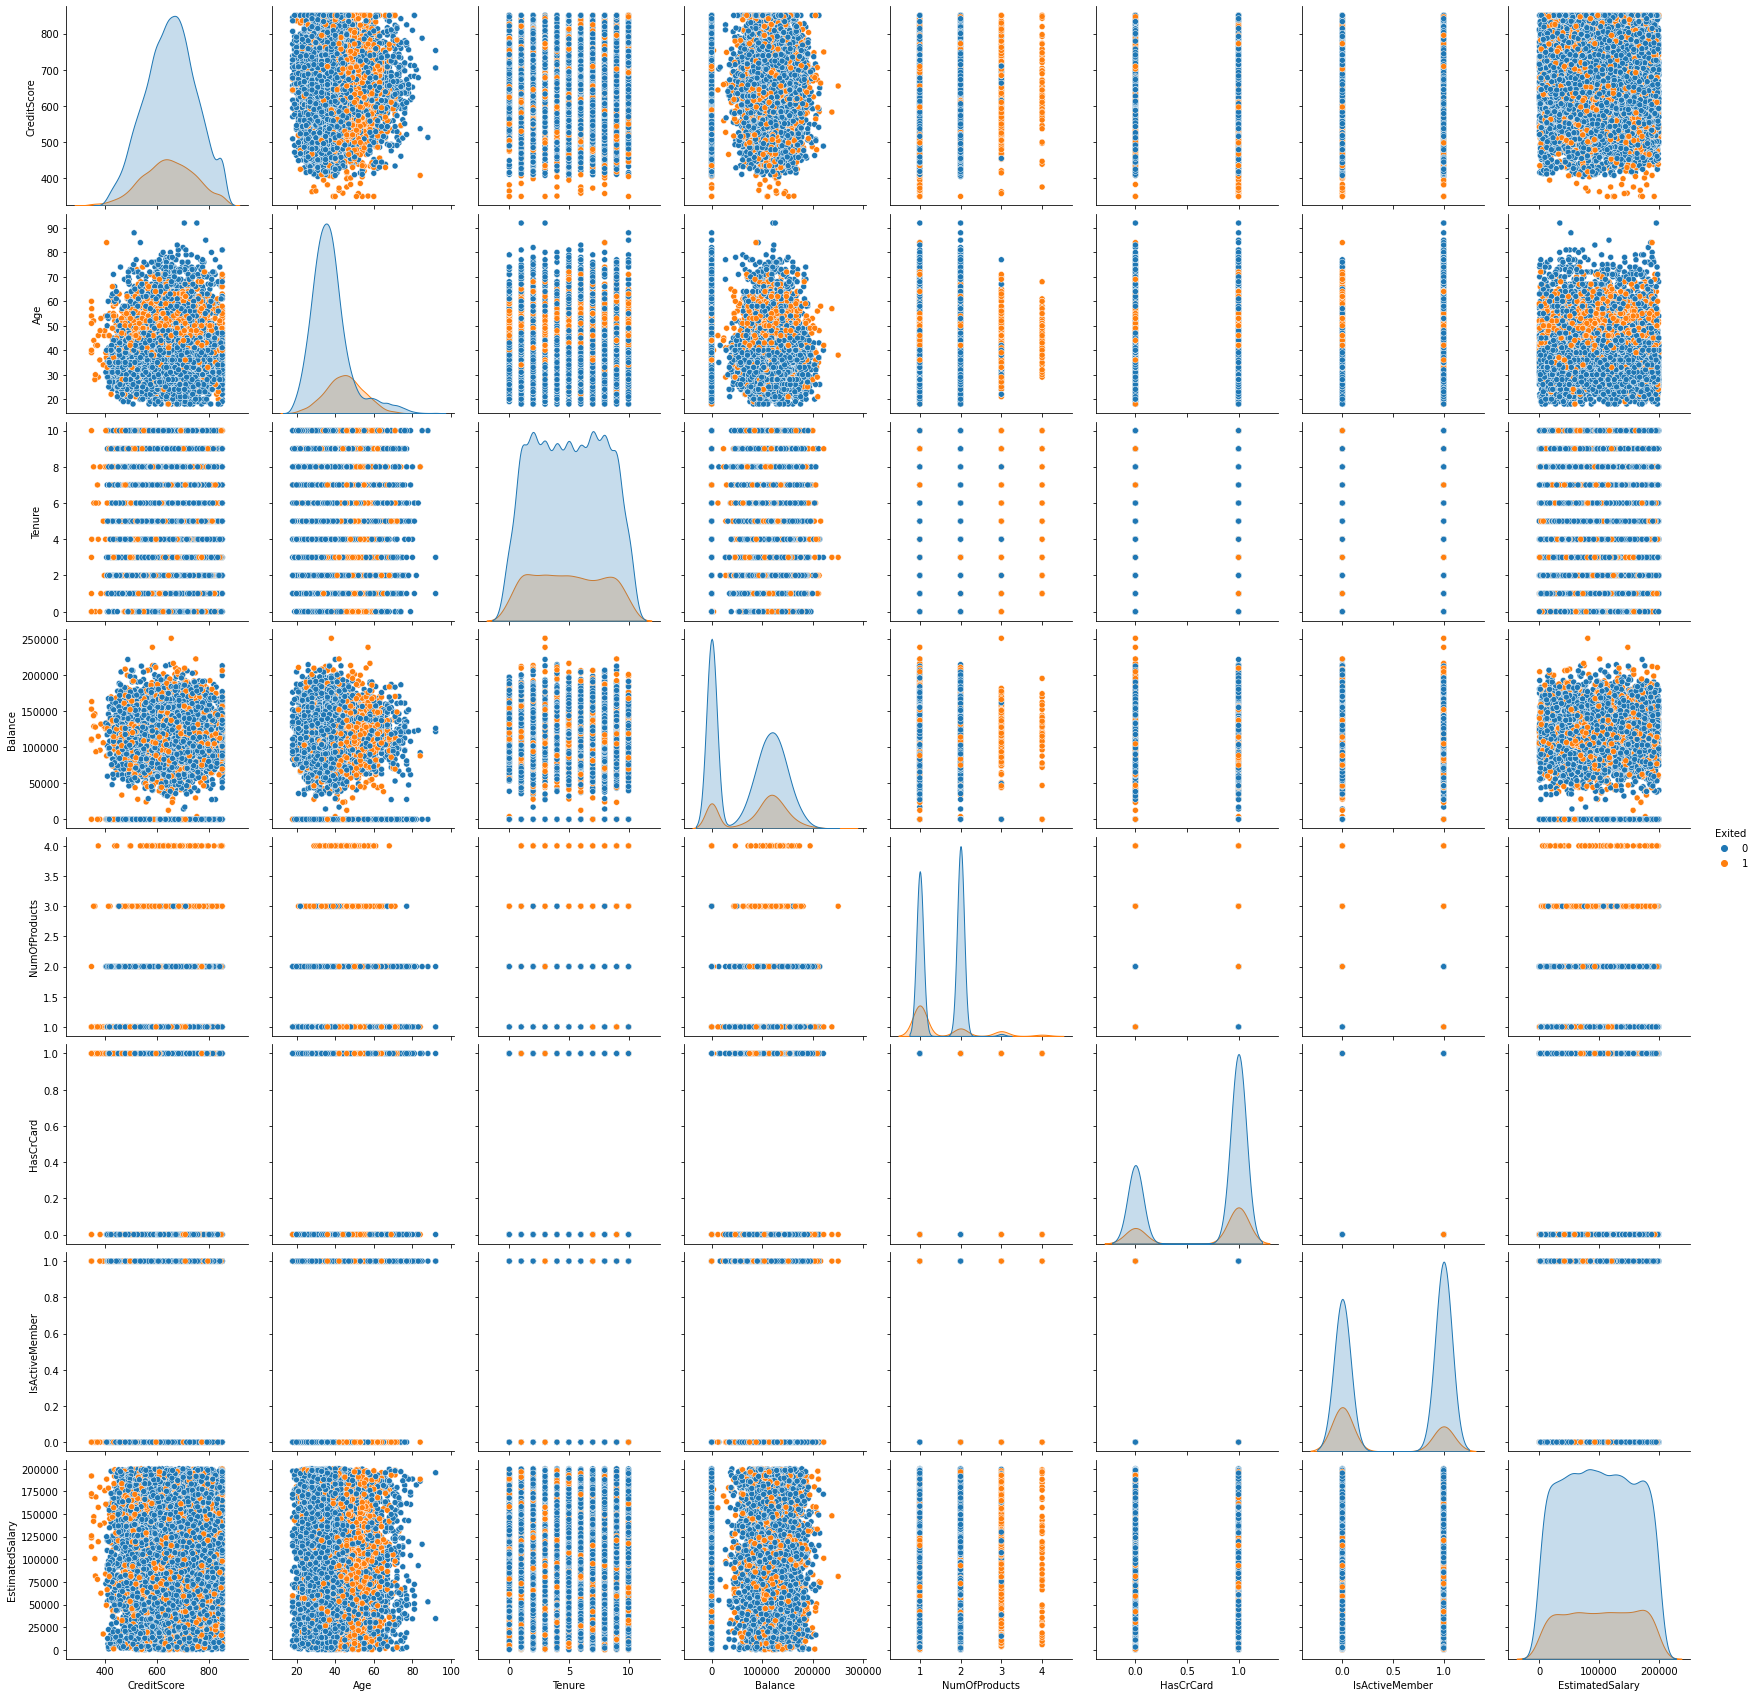

In [16]:
sns.pairplot(data, hue='Exited', height=3)

In [17]:
# Descriptive Analysis

In [18]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
# Handling Missing Values

In [20]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
#  Finding the outliers and replace the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


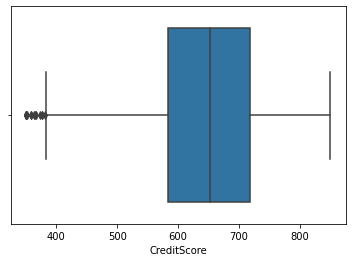

In [22]:
sns.boxplot(data['CreditScore'])

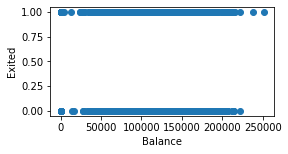

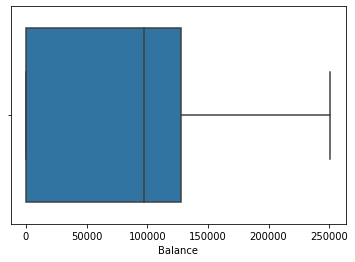

In [24]:
fig, ax = plt.subplots(figsize = (4,2)) 
ax.scatter(data['Balance'], data['Exited'])
 

ax.set_xlabel('Balance')
 

ax.set_ylabel('Exited')
plt.show()

sns.boxplot(x=data['Balance'])

In [25]:
from scipy import stats 
zscore = np.abs(stats.zscore(data['CreditScore']))
print(zscore)
print('No. of Outliers : ', np.shape(np.where(zscore>3)))

0       0.326221
1       0.440036
2       1.536794
3       0.501521
4       2.063884
          ...   
9995    1.246488
9996    1.391939
9997    0.604988
9998    1.256835
9999    1.463771
Name: CreditScore, Length: 10000, dtype: float64
No. of Outliers :  (1, 8)


In [27]:
q = data.quantile([0.55,0.15])
q

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.55,665.0,38.0,5.0,104147.4545,2.0,1.0,1.0,109496.5580,0.0
0.15,545.0,29.0,2.0,0.0000,1.0,0.0,0.0,30658.8015,0.0


In [28]:
iqr =  q.iloc[0] - q.iloc[1]
iqr

CreditScore           120.0000
Age                     9.0000
Tenure                  3.0000
Balance            104147.4545
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     78837.7565
Exited                  0.0000
dtype: float64

In [29]:
u = q.iloc[0] + (2.5*iqr)  
u

CreditScore           965.00000
Age                    60.50000
Tenure                 12.50000
Balance            364516.09075
NumOfProducts           4.50000
HasCrCard               3.50000
IsActiveMember          3.50000
EstimatedSalary    306590.94925
Exited                  0.00000
dtype: float64

In [30]:
l = q.iloc[1] - (2.5*iqr)  
l

CreditScore           245.00000
Age                     6.50000
Tenure                 -5.50000
Balance           -260368.63625
NumOfProducts          -1.50000
HasCrCard              -2.50000
IsActiveMember         -2.50000
EstimatedSalary   -166435.58975
Exited                  0.00000
dtype: float64

In [32]:
Q1 = data['EstimatedSalary'].quantile(0.15) 
Q3 = data['EstimatedSalary'].quantile(0.85)
iqr = Q3 - Q1
print(iqr)
upper=Q3 + 2.5 * iqr
lower=Q1 - 2.5 * iqr
count = np.size(np.where(data['EstimatedSalary'] >upper))
count = count + np.size(np.where(data['EstimatedSalary'] <lower))
print('No. of outliers : ', count)

139663.59199999998
No. of outliers :  0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


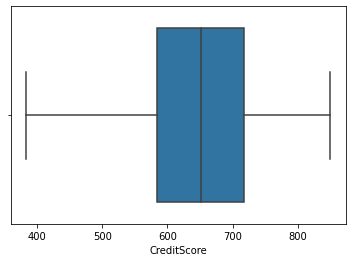

In [33]:
data['CreditScore'] = np.where(np.logical_or(data['CreditScore']>900, data['CreditScore']<383), 650, data['CreditScore'])
sns.boxplot(data['CreditScore'])

In [34]:
upper = data.Age.mean() + (3 * data.Age.std()) #Outlier detection - 3 sigma
lower = data.Age.mean() - (3 * data.Age.std())
columns = data[ ( data['Age'] > upper ) | ( data['Age']<lower ) ]
print('Upper range : ', upper)
print('Lower range : ', lower)
print('No. of Outliers : ', len(columns))

Upper range :  70.38521935511383
Lower range :  7.458380644886169
No. of Outliers :  133


In [35]:
columns = ['EstimatedSalary', 'Age', 'Balance', 'NumOfProducts', 'Tenure', 'CreditScore'] #After outlier removal

for i in columns:
  Q1 = data[i].quantile(0.35)
  Q3 = data[i].quantile(0.85)
  iqr = Q3 - Q1
  upper=Q3 + 3.5 * iqr
  lower=Q1 - 3.5 * iqr
  count = np.size(np.where(data[i] >upper))
  count = count + np.size(np.where(data[i] <lower))
  print('No. of outliers in ', i, ' : ', count)

No. of outliers in  EstimatedSalary  :  0
No. of outliers in  Age  :  0
No. of outliers in  Balance  :  0
No. of outliers in  NumOfProducts  :  0
No. of outliers in  Tenure  :  0
No. of outliers in  CreditScore  :  0


In [36]:
# Check for Categorical columns and perform encoding.

In [38]:
labelencoder = LabelEncoder()
data['Geography']= labelencoder.fit_transform(data['Geography'])
data['Gender'] = labelencoder.fit_transform(data['Gender'])

In [ ]:
# Split the data into dependent and independent variables

In [39]:
x = data.iloc[:, 0:13]
x 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [40]:
y = data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [41]:
# Scale the independent variables

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-0.33295155, -0.90188624, -1.09598752, ...,  0.97024255,
         0.02188649,  1.97716468],
       [-0.44754043,  1.51506738, -1.09598752, ...,  0.97024255,
         0.21653375, -0.50577476],
       [-1.55176059, -0.90188624, -1.09598752, ..., -1.03067011,
         0.2406869 ,  1.97716468],
       ...,
       [ 0.60459387, -0.90188624, -1.09598752, ...,  0.97024255,
        -1.00864308,  1.97716468],
       [ 1.26087566,  0.30659057,  0.91241915, ..., -1.03067011,
        -0.12523071,  1.97716468],
       [ 1.46921909, -0.90188624, -1.09598752, ..., -1.03067011,
        -1.07636976, -0.50577476]])

In [ ]:
# Split the data into training and testing

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)
x_train

array([[-0.10377378, -0.90188624,  0.91241915, ...,  0.97024255,
        -0.77021814,  1.97716468],
       [-1.14549091, -0.90188624,  0.91241915, ..., -1.03067011,
        -1.39576675, -0.50577476],
       [-0.63504951, -0.90188624, -1.09598752, ...,  0.97024255,
        -1.49965629, -0.50577476],
       ...,
       [ 0.90669184, -0.90188624,  0.91241915, ..., -1.03067011,
         1.41441489, -0.50577476],
       [-0.63504951,  1.51506738, -1.09598752, ...,  0.97024255,
         0.84614739, -0.50577476],
       [-0.29128286,  0.30659057, -1.09598752, ..., -1.03067011,
         0.32630495,  1.97716468]])

In [46]:
x_train.shape

(7000, 11)

In [47]:
x_test

array([[-0.56212931,  0.30659057, -1.09598752, ...,  0.97024255,
         1.61304597, -0.50577476],
       [-1.33299999, -0.90188624, -1.09598752, ..., -1.03067011,
         0.49753166,  1.97716468],
       [ 0.57334236,  1.51506738, -1.09598752, ...,  0.97024255,
        -0.4235611 , -0.50577476],
       ...,
       [ 0.35458176, -0.90188624,  0.91241915, ...,  0.97024255,
         1.17045451, -0.50577476],
       [ 0.42750196, -0.90188624,  0.91241915, ...,  0.97024255,
        -0.50846777, -0.50577476],
       [ 0.83377164,  0.30659057, -1.09598752, ...,  0.97024255,
        -1.15342685,  1.97716468]])

In [48]:
x_test.shape

(3000, 11)

In [49]:
y_train

7681    1
9031    0
3691    0
202     1
5625    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 7000, dtype: int64

In [50]:
y_train

7681    1
9031    0
3691    0
202     1
5625    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 7000, dtype: int64